<a href="https://colab.research.google.com/github/kushrestha23/DVD-Countries-Data-Enhancement./blob/main/Kusumakar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Data Wrangling in the SQL**
```
SELECT COUNTRY,
SUM(P.AMOUNT) AS TOTAL_REVENUE
FROM PAYMENT AS P
JOIN CUSTOMER AS C ON P.CUSTOMER_ID = C.CUSTOMER_ID
JOIN ADDRESS AS A ON C.ADDRESS_ID = A.ADDRESS_ID
JOIN CITY AS CT ON A.CITY_ID = CT.CITY_ID
JOIN COUNTRY AS CO ON CT.COUNTRY_ID = CO.COUNTRY_ID
GROUP BY COUNTRY
ORDER BY TOTAL_REVENUE DESC
LIMIT 15;
```



##**Connecting the CSV file from the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the Data from the CSV File**

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Python/revenue_by_countries.csv'
df = pd.read_csv(path)

df.describe

<bound method NDFrame.describe of                country  total_revenue
0                India        6034.78
1                China        5251.03
2        United States        3685.31
3                Japan        3122.51
4               Mexico        2984.82
5               Brazil        2919.19
6   Russian Federation        2765.62
7          Philippines        2219.70
8               Turkey        1498.49
9            Indonesia        1352.69
10             Nigeria        1314.92
11           Argentina        1298.80
12              Taiwan        1155.10
13        South Africa        1069.46
14                Iran         877.96>

## **Creating the Visualization with Matplotlib**

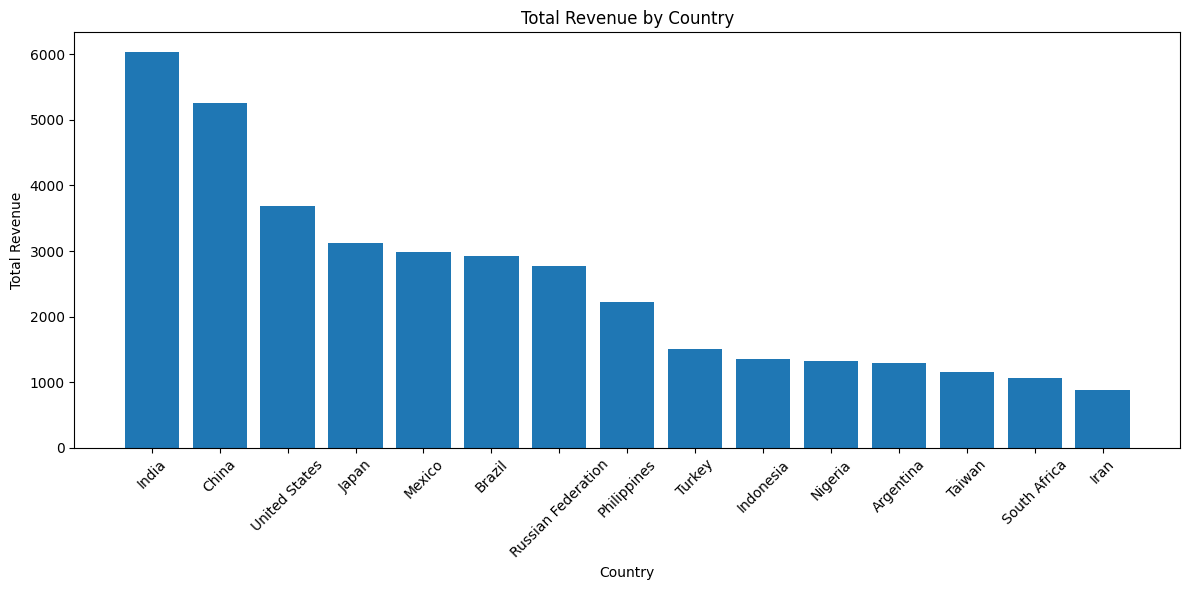

In [ ]:
# Import the Matplotlib library
import matplotlib.pyplot as plt

# Sort the DataFrame by total revenue in descending order
df = df.sort_values(by='total_revenue', ascending=False)

# Limit the number of countries to display (optional)
top_countries = df.head(15)

#Creating a new figure for the plot with a specific size
plt.figure(figsize=(12, 6))

#Creating a bar chart using 'country' as the x-axis and 'total_revenue' as the y-axis
plt.bar(top_countries['country'], top_countries['total_revenue'])

#Adding labels for the x and y axes
plt.xlabel('Country')
plt.ylabel('Total Revenue')

#Adding the title to the plot
plt.title('Total Revenue by Country')

#Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## **Data Wrangling in the SQL**
```
SELECT
    c.country,
    -- Query 1: Number of Customers
    (SELECT COUNT(cu.customer_id)
     FROM customer cu
     JOIN address a ON cu.address_id = a.address_id
     JOIN city ci ON a.city_id = ci.city_id
     WHERE ci.country_id = c.country_id) AS num_customers,
    -- Query 2: Total Rental Duration
    (SELECT SUM(EXTRACT(DAY FROM (r.return_date - r.rental_date)))
     FROM rental r
     JOIN customer cu ON r.customer_id = cu.customer_id
     JOIN address a ON cu.address_id = a.address_id
     JOIN city ci ON a.city_id = ci.city_id
     WHERE ci.country_id = c.country_id) AS total_rental_duration,
    -- Query 3: Total Payments
    (SELECT COUNT(p.payment_id)
     FROM payment p
     JOIN customer cu ON p.customer_id = cu.customer_id
     JOIN address a ON cu.address_id = a.address_id
     JOIN city ci ON a.city_id = ci.city_id
     WHERE ci.country_id = c.country_id) AS total_payments
FROM country c
ORDER BY c.country;
```

### **Mounting the Google drive to retrieve the CSV data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## **Importing the CSV File**

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Python/Country_numberOfCustomers.csv'
df_modified = pd.read_csv(path)

df_modified.describe

<bound method NDFrame.describe of                   country  num_customers  total_rental_duration  \
0             Afghanistan              1                   75.0   
1                 Algeria              3                  417.0   
2          American Samoa              1                   67.0   
3                  Angola              2                  241.0   
4                Anguilla              1                  138.0   
..                    ...            ...                    ...   
104               Vietnam              6                  835.0   
105  Virgin Islands, U.S.              1                  128.0   
106                 Yemen              4                  516.0   
107            Yugoslavia              2                  274.0   
108                Zambia              1                  143.0   

     total_payments  
0                18  
1                82  
2                15  
3                45  
4                32  
..              ...  
104    

## **Importing the existing countries table in the CSV Format**

In [3]:
import pandas as pd

path = '/content/drive/MyDrive/Python/countries.csv'
df_exisiting = pd.read_csv(path)

df_exisiting.describe

<bound method NDFrame.describe of      country_id               country          last_update
0             1           Afghanistan  2006-02-15 09:44:00
1             2               Algeria  2006-02-15 09:44:00
2             3        American Samoa  2006-02-15 09:44:00
3             4                Angola  2006-02-15 09:44:00
4             5              Anguilla  2006-02-15 09:44:00
..          ...                   ...                  ...
104         105               Vietnam  2006-02-15 09:44:00
105         106  Virgin Islands, U.S.  2006-02-15 09:44:00
106         107                 Yemen  2006-02-15 09:44:00
107         108            Yugoslavia  2006-02-15 09:44:00
108         109                Zambia  2006-02-15 09:44:00

[109 rows x 3 columns]>

# **Merging the existing table with modified table**

In [4]:
merged_countries = df_exisiting.merge(df_modified, on="country", how="left")

In [5]:
merged_countries = merged_countries.fillna(df_exisiting)

In [6]:
merged_countries.to_csv("/content/drive/MyDrive/Python/merged_countries.csv", index=False)

merged_countries.head()

,country_id,country,last_update,num_customers,total_rental_duration,total_payments
0,1,Afghanistan,2006-02-15 09:44:00,1,75.0,18
1,2,Algeria,2006-02-15 09:44:00,3,417.0,82
2,3,American Samoa,2006-02-15 09:44:00,1,67.0,15
3,4,Angola,2006-02-15 09:44:00,2,241.0,45
4,5,Anguilla,2006-02-15 09:44:00,1,138.0,32


# **Importing the City CSV File**

In [7]:
import pandas as pd

path = '/content/drive/MyDrive/Python/city.csv'
df_city = pd.read_csv(path)

df_city.describe

<bound method NDFrame.describe of      city_id                city  country_id          last_update
0          1  A Corua (La Corua)          87  2006-02-15 09:45:25
1          2                Abha          82  2006-02-15 09:45:25
2          3           Abu Dhabi         101  2006-02-15 09:45:25
3          4                Acua          60  2006-02-15 09:45:25
4          5               Adana          97  2006-02-15 09:45:25
..       ...                 ...         ...                  ...
595      596               Zaria          69  2006-02-15 09:45:25
596      597        Zeleznogorsk          80  2006-02-15 09:45:25
597      598         Zhezqazghan          51  2006-02-15 09:45:25
598      599            Zhoushan          23  2006-02-15 09:45:25
599      600          Ziguinchor          83  2006-02-15 09:45:25

[600 rows x 4 columns]>

# **Merging the countries with the existing cities table**

In [8]:
merged_countries_cities = merged_countries.merge(df_city, on="country_id", how="left")
merged_countries_cities.drop(['last_update_x','last_update_y','country_id'],axis = 1).fillna(merged_countries)

,country,num_customers,total_rental_duration,total_payments,city_id,city
0,Afghanistan,1,75.0,18,251,Kabul
1,Algeria,3,417.0,82,59,Batna
2,Algeria,3,417.0,82,63,Bchar
3,Algeria,3,417.0,82,483,Skikda
4,American Samoa,1,67.0,15,516,Tafuna
...,...,...,...,...,...,...
595,Yemen,4,516.0,107,455,Sanaa
596,Yemen,4,516.0,107,518,Taizz
597,Yugoslavia,2,274.0,51,280,Kragujevac
598,Yugoslavia,2,274.0,51,368,Novi Sad


# **Importing the Address table as CSV**

In [9]:
import pandas as pd

path = '/content/drive/MyDrive/Python/address.csv'
df_address = pd.read_csv(path)

df_address.describe

<bound method NDFrame.describe of      address_id                   address  address2      district  city_id  \
0             1         47 MySakila Drive       NaN       Alberta      300   
1             2        28 MySQL Boulevard       NaN           QLD      576   
2             3         23 Workhaven Lane       NaN       Alberta      300   
3             4      1411 Lillydale Drive       NaN           QLD      576   
4             5            1913 Hanoi Way       NaN      Nagasaki      463   
..          ...                       ...       ...           ...      ...   
598         601       844 Bucuresti Place       NaN      Liaoning      242   
599         602  1101 Bucuresti Boulevard       NaN   West Greece      401   
600         603    1103 Quilmes Boulevard       NaN         Piura      503   
601         604       1331 Usak Boulevard       NaN          Vaud      296   
602         605      1325 Fukuyama Street       NaN  Heilongjiang      537   

     postal_code         phon

# **Merging the address table in the modified country table**

In [11]:
merged_address = merged_countries_cities.merge(df_address, on="city_id", how="left")
final = merged_address.drop(['country_id','last_update_x','city_id','last_update_y','address_id','address2','last_update'],axis = 1).fillna(merged_countries_cities)
final['phone'] = final['phone'].astype(str)
final


,country,num_customers,total_rental_duration,total_payments,city,address,district,postal_code,phone
0,Afghanistan,1,75.0,18,Kabul,1168 Najafabad Parkway,Kabol,40301.0,886649065861.0
1,Algeria,3,417.0,82,Batna,1924 Shimonoseki Drive,Batna,52625.0,406784385440.0
2,Algeria,3,417.0,82,Bchar,1031 Daugavpils Parkway,Bchar,59025.0,107137400143.0
3,Algeria,3,417.0,82,Skikda,757 Rustenburg Avenue,Skikda,89668.0,506134035434.0
4,American Samoa,1,67.0,15,Tafuna,1892 Nabereznyje Telny Lane,Tutuila,28396.0,478229987054.0
...,...,...,...,...,...,...,...,...,...
599,Yemen,4,516.0,107,Sanaa,687 Alessandria Parkway,Sanaa,57587.0,407218522294.0
600,Yemen,4,516.0,107,Taizz,1001 Miyakonojo Lane,Taizz,67924.0,584316724815.0
601,Yugoslavia,2,274.0,51,Kragujevac,900 Santiago de Compostela Parkway,Central Serbia,93896.0,716571220373.0
602,Yugoslavia,2,274.0,51,Novi Sad,1917 Kumbakonam Parkway,Vojvodina,11892.0,698182547686.0
